<a href="https://colab.research.google.com/github/Camillabgarcia/visao_computacional_opencv/blob/main/Reconhecimento_texto_OCR_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação das bibliotecas:

In [1]:
!pip install opencv-python==4.6.0.66
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu j

Importação das bibliotecas:

In [2]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow # Para mostrar as imagens no Google Colab

Importando os dados diretamente de um repositório do GitHub:

In [3]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144 (from 1)
Receiving objects: 100% (148/148), 37.21 MiB | 24.77 MiB/s, done.
Resolving deltas: 100% (35/35), done.


Importando uma imagem:

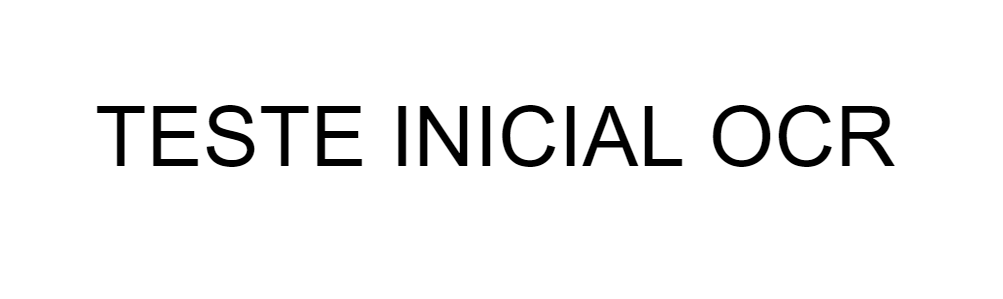

In [4]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

Retirando o texto da imagem:

In [5]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



Importando imagem BGR:

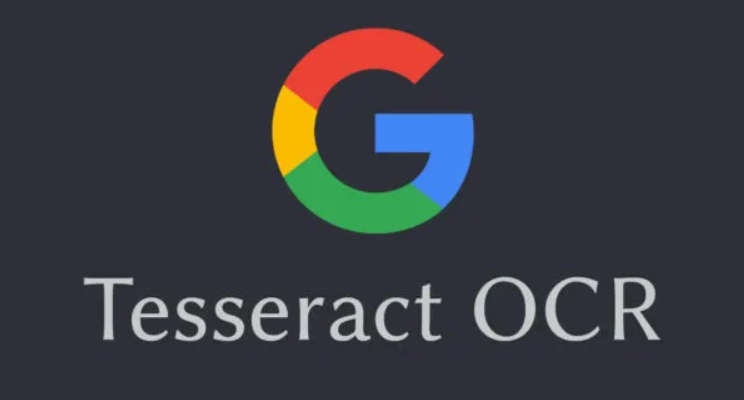

In [6]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

Conversão de BGR para RGB:

Obs: O OpenCV, por padrão, lê as cores em BGR.

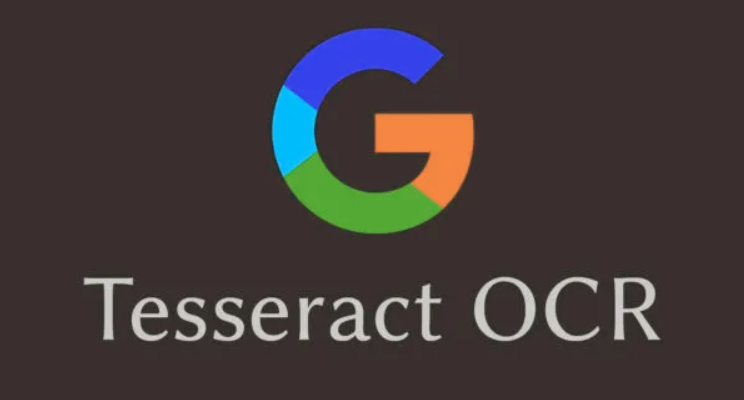

In [7]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Alterando a cor da imagem para cinza:

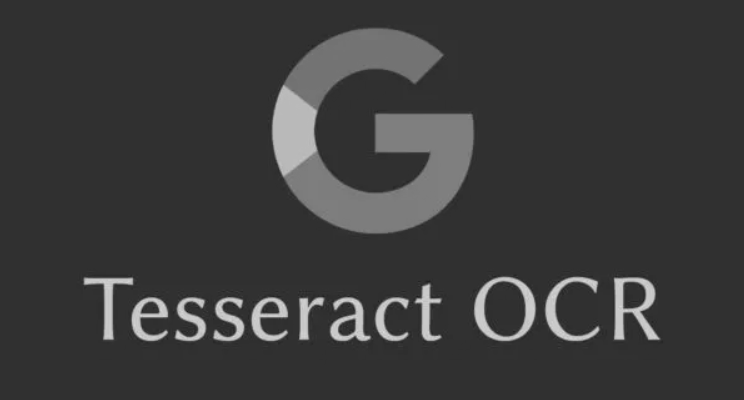

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

Analisando como Tesseract vai reagir retirando/capturando o texto a partir das imagens.

- RBG:

In [9]:
texto = pytesseract.image_to_string(rgb)
print(texto)

c

Tesseract OCR



- Cinza:

In [10]:
texto = pytesseract.image_to_string(gray)
print(texto)

C

Tesseract OCR



Textos mais complexo(caracteres diferentes).

Convertendo as cores que antes eram azuis:


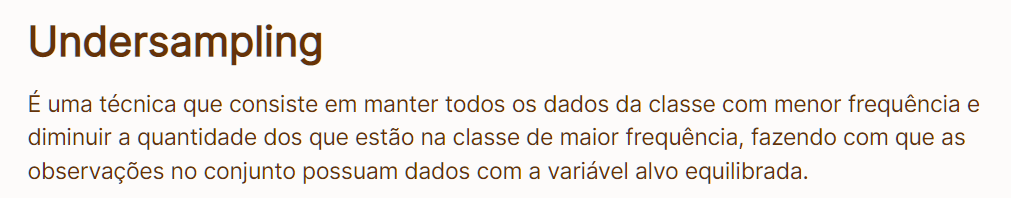

In [11]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png') # Leitura da imagem.
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Essa linha converte a imagem de BGR para RGB, garantindo que o Tesseract entenda as cores da imagem corretamente.
cv2_imshow(rgb) # Visualizando.

Retirando o texto da imagem:

In [12]:
texto = pytesseract.image_to_string(rgb) # Leitura do texto na imagem.
print(texto)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



Verificando as linguagens que estão dentro do Tesseract:

In [13]:
!tesseract --list-langs

List of available languages (2):
eng
osd


Como não possui o português, será necessário instalar para entender melhor o texto acima, melhorando assim sua tradução:

In [14]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 1s (1,497 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 123676 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


Vericando a instalação:

In [15]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


Fazendo a leitura novamente:

In [16]:
texto = pytesseract.image_to_string(rgb, lang='por') # Leitura do texto na imagem.
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



DESAFIO:

PSM (ajuda o OCR a entender como a imagem com o texto está estruturada).

Visualizando os diferentes modos de segmentação de página que o OCR pode utilizar:

In [17]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


Analisando uma imagem:

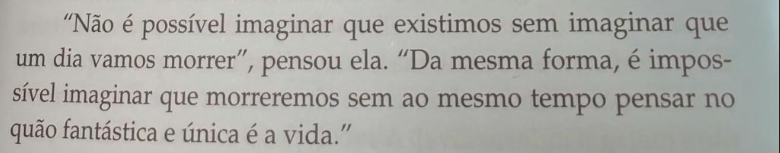

In [18]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png') # Leitura da imagem.
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Essa linha converte a imagem de BGR para RGB, garantindo que o Tesseract entenda as cores da imagem corretamente.
cv2_imshow(rgb) # Visualizando.

Verificando como OCR reage sem o PSM:

In [19]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

TesseractError: (1, 'Error opening data file tessdata/por.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'por\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')